## Setting Up Credit Card Defaults (CC) and King-Rook vs. King-Pawn (KK)

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import time
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score as accuracy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC as SupportVectorClassifier
from sklearn.neighbors import KNeighborsClassifier

masterTime = time.time()

dataCC = pd.read_csv("creditCardDefaults.csv")
dataKK = pd.read_csv("kingRookKingPawn.csv")

In [3]:
instancesCC = dataCC.drop(labels='Y', axis='columns', inplace=False)
labelsCC = dataCC.iloc[:,-1]
instancesKK = dataKK.drop(labels='canWin?', axis='columns', inplace=False)
labelsKK = dataKK.iloc[:,-1]

# The King-Pawn vs. King-Rook dataset actually has a unique challenge. The data is in form of t/f and other character values.
# As sklearn's library doesn't work well (or at all) will non-integer values, we have to use pandas.get_dummies() to one-hot
# encode our character values into integers.
print("Number of Attribute Columns (KK): " + str(instancesKK.shape[1]))
instancesKK = pd.get_dummies(instancesKK)
print("Number of Attribute Columns (KK): " + str(instancesKK.shape[1]))

# here we set random_state constant so we get constant results
xTrainCC, xTestCC, yTrainCC, yTestCC = train_test_split(instancesCC, labelsCC, random_state=2019, test_size=.3)
xTrainKK, xTestKK, yTrainKK, yTestKK = train_test_split(instancesKK, labelsKK, random_state=2019, test_size=.3)

Number of Attribute Columns (KK): 36
Number of Attribute Columns (KK): 73


## Decision Trees

In [3]:
# Vanilla Decision Tree
dtCC = DecisionTreeClassifier(random_state=2019)
t0 = time.time()
dtCC.fit(xTrainCC, yTrainCC)
t1 = time.time()
predictionsCC = dtCC.predict(xTrainCC)
t2 = time.time()
print("Accuracy of Decision Tree (Training Data, CC): " + str(accuracy(yTrainCC, predictionsCC)))
predictionsCC = dtCC.predict(xTestCC)
t3 = time.time()
print("Accuracy of Decision Tree (Testing Data, CC): " + str(accuracy(yTestCC, predictionsCC)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of Decision Tree (Training Data, CC): 0.9992857142857143
Accuracy of Decision Tree (Testing Data, CC): 0.7282222222222222
Time to Train: 0.783043384552002s. Times to Test: 0.010480165481567383 and 0.00898289680480957 seconds.


In [4]:
# Duplicate for KK
dtKK = DecisionTreeClassifier(random_state=2019)
t0 = time.time()
dtKK.fit(xTrainKK, yTrainKK)
t1 = time.time()
predictionsKK = dtKK.predict(xTrainKK)
t2 = time.time()
print("Accuracy of Decision Tree (Training Data, KK): " + str(accuracy(yTrainKK, predictionsKK)))
predictionsKK = dtKK.predict(xTestKK)
t3 = time.time()
print("Accuracy of Decision Tree (Testing Data, KK): " + str(accuracy(yTestKK, predictionsKK)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of Decision Tree (Training Data, KK): 1.0
Accuracy of Decision Tree (Testing Data, KK): 0.9979144942648592
Time to Train: 0.013973474502563477s. Times to Test: 0.0009984970092773438 and 0.001996278762817383 seconds.


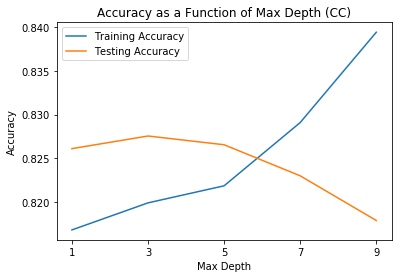

In [5]:
# Manipulating Max Depth Hyperparameter

depths = []
trainAccuracies = []
testAccuracies = []

for i in range(1,10,2):
    depths.append(i)
    mdTree = DecisionTreeClassifier(max_depth=i, random_state=2019)
    mdTree.fit(xTrainCC, yTrainCC)
    trainAccuracies.append(accuracy(yTrainCC, mdTree.predict(xTrainCC)))
    testAccuracies.append(accuracy(yTestCC, mdTree.predict(xTestCC)))

plt.figure("maxDepthCC")
plt.title("Accuracy as a Function of Max Depth (CC)")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3,4], depths) # Neat little trick to change up the x ticks
plt.legend(loc="best")
plt.show()

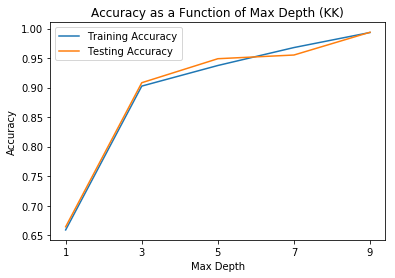

In [6]:
# Duplicate for KK
depths = []
trainAccuracies = []
testAccuracies = []

for i in range(1,10,2):
    depths.append(i)
    mdTree = DecisionTreeClassifier(max_depth=i, random_state=2019)
    mdTree.fit(xTrainKK, yTrainKK)
    trainAccuracies.append(accuracy(yTrainKK, mdTree.predict(xTrainKK)))
    testAccuracies.append(accuracy(yTestKK, mdTree.predict(xTestKK)))

plt.figure("maxDepthKK")
plt.title("Accuracy as a Function of Max Depth (KK)")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3,4], depths) # Neat little trick to change up the x ticks
plt.legend(loc="best")
plt.show()

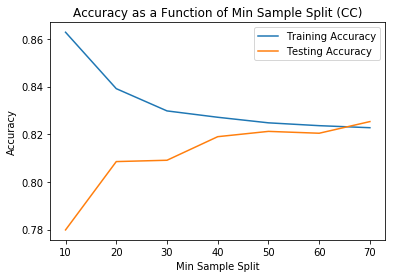

In [52]:
# Manipulating Min Sample Split Hyperparameter

minSamples = [10, 20, 30, 40, 50, 60, 70]
trainAccuracies = []
testAccuracies = []

for i in minSamples:
    msTree = DecisionTreeClassifier(min_samples_leaf=i, random_state=2019)
    msTree.fit(xTrainCC, yTrainCC)
    trainAccuracies.append(accuracy(yTrainCC, msTree.predict(xTrainCC)))
    testAccuracies.append(accuracy(yTestCC, msTree.predict(xTestCC)))
    
plt.figure("minSampleSplit")
plt.title("Accuracy as a Function of Min Sample Split (CC)")
plt.ylabel("Accuracy")
plt.xlabel("Min Sample Split")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3,4,5,6], minSamples)
plt.legend(loc="best")
plt.show()

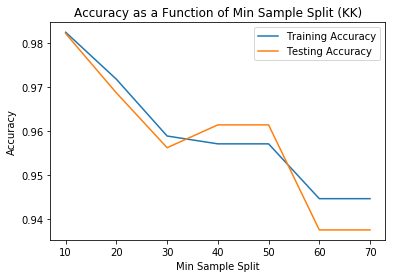

In [51]:
# Duplicate for KK
minSamples = [10, 20, 30, 40, 50, 60, 70]
trainAccuracies = []
testAccuracies = []

for i in minSamples:
    msTree = DecisionTreeClassifier(min_samples_leaf=i, random_state=2019)
    msTree.fit(xTrainKK, yTrainKK)
    trainAccuracies.append(accuracy(yTrainKK, msTree.predict(xTrainKK)))
    testAccuracies.append(accuracy(yTestKK, msTree.predict(xTestKK)))
    
plt.figure("minSampleSplit")
plt.title("Accuracy as a Function of Min Sample Split (KK)")
plt.ylabel("Accuracy")
plt.xlabel("Min Sample Split")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3,4,5,6], minSamples)
plt.legend(loc="best")
plt.show()

In [9]:
# Finding optimal decision tree hyperparameters based off our experiments above.

dtHyperparameters = {"max_depth": [1, 3, 5, 7, 9], "min_samples_leaf": [10, 20, 30, 40, 50, 60, 70]}
t0 = time.time()
dtCrossvalidaterCC = GridSearchCV(dtCC, dtHyperparameters, cv=5, refit=True)
dtCrossvalidaterCC.fit(xTrainCC, yTrainCC)
t1 = time.time()

predictionsCC = dtCrossvalidaterCC.predict(xTrainCC)
t2 = time.time()
print("Accuracy of Optimal Decision Tree (Training Data, CC): " + str(accuracy(yTrainCC, predictionsCC)))

predictionsCC = dtCrossvalidaterCC.predict(xTestCC)
t3 = time.time()
print("Accuracy of Optimal Decision Tree (Testing Data, CC): " + str(accuracy(yTestCC, predictionsCC)))

optimalTreeCC = dtCrossvalidaterCC.best_estimator_
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")
print(optimalTreeCC)

Accuracy of Optimal Decision Tree (Training Data, CC): 0.8199047619047619
Accuracy of Optimal Decision Tree (Testing Data, CC): 0.8275555555555556
Time to Train: 22.88644289970398s. Times to Test: 0.003993034362792969 and 0.004494428634643555 seconds.
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best')


In [10]:
# Duplicate for KK

dtHyperparameters = {"max_depth": [1, 3, 5, 7, 9], "min_samples_leaf": [10, 20, 30, 40, 50, 60, 70]}
t0 = time.time()
dtCrossvalidaterKK = GridSearchCV(dtKK, dtHyperparameters, cv=5, refit=True)
dtCrossvalidaterKK.fit(xTrainKK, yTrainKK)
t1 = time.time()

predictionsKK = dtCrossvalidaterKK.predict(xTrainKK)
t2 = time.time()
print("Accuracy of Decision Tree (Training Data, KK): " + str(accuracy(yTrainKK, predictionsKK)))

predictionsKK = dtCrossvalidaterKK.predict(xTestKK)
t3 = time.time()
print("Accuracy of Decision Tree (Testing Data, KK): " + str(accuracy(yTestKK, predictionsKK)))

optimalTreeKK = dtCrossvalidaterKK.best_estimator_
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")
print(optimalTreeKK)

Accuracy of Decision Tree (Training Data, KK): 0.9825659365221279
Accuracy of Decision Tree (Testing Data, KK): 0.9822732012513035
Time to Train: 1.7951629161834717s. Times to Test: 0.0009965896606445312 and 0.0019981861114501953 seconds.
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best')


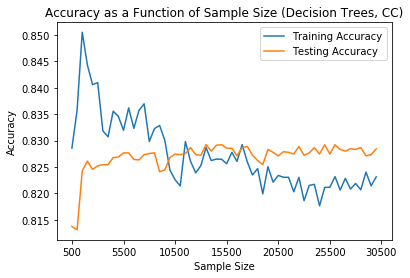

In [11]:
# Manipulating Sample Size Hyperparameter (CC)

trainAccuracies = []
testAccuracies = []

for i in range(500, 30001, 500):
    partialInstancesCC = instancesCC.sample(n=i, random_state=2019)
    partialLabelsCC = labelsCC.sample(n=i, random_state=2019)
    pxTrainCC, pxTestCC, pyTrainCC, pyTestCC = train_test_split(partialInstancesCC, partialLabelsCC, random_state=2019, test_size=.3)
    optimalTreeCC.fit(pxTrainCC, pyTrainCC)
    trainAccuracies.append(accuracy(pyTrainCC, optimalTreeCC.predict(pxTrainCC)))
    testAccuracies.append(accuracy(yTestCC, optimalTreeCC.predict(xTestCC)))
    
plt.figure("sampleSizeDT")
plt.title("Accuracy as a Function of Sample Size (Decision Trees, CC)")
plt.ylabel("Accuracy")
plt.xlabel("Sample Size")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,10,20,30,40,50,60], [500, 5500, 10500, 15500, 20500, 25500, 30500])
plt.legend(loc="best")
plt.show()

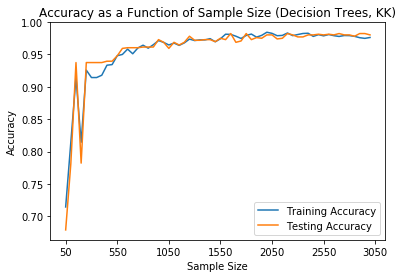

In [12]:
# Duplicate for KK
trainAccuracies = []
testAccuracies = []

for i in range(50, 3001, 50):
    partialInstancesKK = instancesKK.sample(n=i, random_state=2019)
    partialLabelsKK = labelsKK.sample(n=i, random_state=2019)
    pxTrainKK, pxTestKK, pyTrainKK, pyTestKK = train_test_split(partialInstancesKK, partialLabelsKK, random_state=2019, test_size=.3)
    optimalTreeKK.fit(pxTrainKK, pyTrainKK)
    trainAccuracies.append(accuracy(pyTrainKK, optimalTreeKK.predict(pxTrainKK)))
    testAccuracies.append(accuracy(yTestKK, optimalTreeKK.predict(xTestKK)))
    
plt.figure("sampleSizeDT")
plt.title("Accuracy as a Function of Sample Size (Decision Trees, KK)")
plt.ylabel("Accuracy")
plt.xlabel("Sample Size")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,10,20,30,40,50,60], [50, 550, 1050, 1550, 2050, 2550, 3050])
plt.legend(loc="best")
plt.show()

## Neural Networks

In [13]:
# Vanilla Neural Networks

t0 = time.time()
nnCC = MLPClassifier(random_state=2019)
nnCC.fit(xTrainCC, yTrainCC)
t1 = time.time()

predictionsCC = nnCC.predict(xTrainCC)
t2 = time.time()
print("Accuracy of Neural Network (Training Data, CC): " + str(accuracy(yTrainCC, predictionsCC)))
predictionsCC = nnCC.predict(xTestCC)
t3 = time.time()
print("Accuracy of Neural Network (Testing Data, CC): " + str(accuracy(yTestCC, predictionsCC)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")
print(nnCC)

Accuracy of Neural Network (Training Data, CC): 0.7705714285714286
Accuracy of Neural Network (Testing Data, CC): 0.7777777777777778
Time to Train: 1.6843671798706055s. Times to Test: 0.04641437530517578 and 0.02595067024230957 seconds.
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2019,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [14]:
# Duplicate for KK

t0 = time.time()
nnKK = MLPClassifier(random_state=2019)
nnKK.fit(xTrainKK, yTrainKK)
t1 = time.time()

predictionsKK = nnKK.predict(xTrainKK)
t2 = time.time()
print("Accuracy of Neural Network (Training Data, KK): " + str(accuracy(yTrainKK, predictionsKK)))
predictionsKK = nnKK.predict(xTestKK)
t3 = time.time()
print("Accuracy of Neural Network (Testing Data, KK): " + str(accuracy(yTestKK, predictionsKK)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")
print(nnKK)

Accuracy of Neural Network (Training Data, KK): 0.9928475637013858
Accuracy of Neural Network (Testing Data, KK): 0.986444212721585
Time to Train: 2.0322206020355225s. Times to Test: 0.00948333740234375 and 0.005489349365234375 seconds.
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2019,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


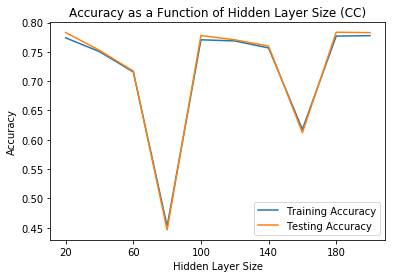

In [58]:
# Manipulating Hidden Layer Hyperparameter

trainAccuracies = []
testAccuracies = []

for i in range(20, 201, 20):
    hlNN = MLPClassifier(hidden_layer_sizes=i, random_state=2019)
    hlNN.fit(xTrainCC, yTrainCC)
    trainAccuracies.append(accuracy(yTrainCC, hlNN.predict(xTrainCC)))
    testAccuracies.append(accuracy(yTestCC, hlNN.predict(xTestCC)))
    
plt.figure("hiddenLayer")
plt.title("Accuracy as a Function of Hidden Layer Size (CC)")
plt.ylabel("Accuracy")
plt.xlabel("Hidden Layer Size")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,2,4,6,8], [20,60, 100, 140, 180])
plt.legend(loc="best")
plt.show()

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


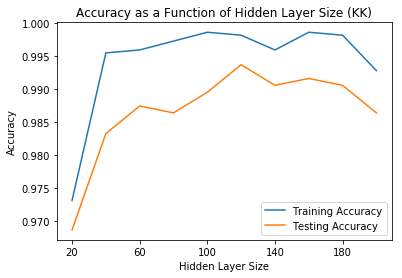

In [57]:
# Duplicate for KK
trainAccuracies = []
testAccuracies = []

for i in range(10, 101, 10):
    hlNN = MLPClassifier(hidden_layer_sizes=i, random_state=2019)
    hlNN.fit(xTrainKK, yTrainKK)
    trainAccuracies.append(accuracy(yTrainKK, hlNN.predict(xTrainKK)))
    testAccuracies.append(accuracy(yTestKK, hlNN.predict(xTestKK)))
    
plt.figure("hiddenLayer")
plt.title("Accuracy as a Function of Hidden Layer Size (KK)")
plt.ylabel("Accuracy")
plt.xlabel("Hidden Layer Size")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,2,4,6,8], [20,60, 100, 140, 180])
plt.legend(loc="best")
plt.show()

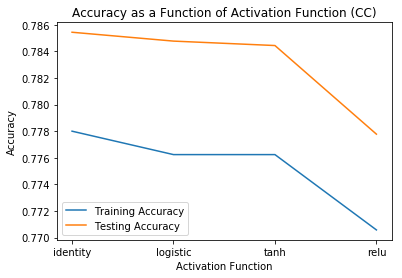

In [17]:
# Manipulating Activation Function Hyperparameter

activations = ["identity", "logistic", "tanh", "relu"]
trainAccuracies = []
testAccuracies = []

for i in range(4):
    afNN = MLPClassifier(activation=activations[i], random_state=2019)
    afNN.fit(xTrainCC, yTrainCC)
    trainAccuracies.append(accuracy(yTrainCC, afNN.predict(xTrainCC)))
    testAccuracies.append(accuracy(yTestCC, afNN.predict(xTestCC)))
    
plt.figure("activations")
plt.title("Accuracy as a Function of Activation Function (CC)")
plt.ylabel("Accuracy")
plt.xlabel("Activation Function")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3], activations)
plt.legend(loc="best")
plt.show()

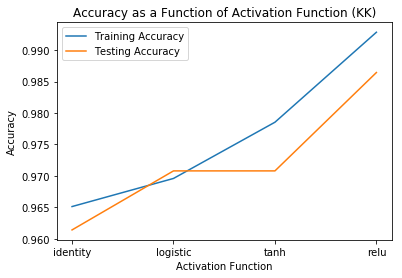

In [18]:
# Duplicate for KK
activations = ["identity", "logistic", "tanh", "relu"]
trainAccuracies = []
testAccuracies = []

for i in range(4):
    afNN = MLPClassifier(activation=activations[i], random_state=2019)
    afNN.fit(xTrainKK, yTrainKK)
    trainAccuracies.append(accuracy(yTrainKK, afNN.predict(xTrainKK)))
    testAccuracies.append(accuracy(yTestKK, afNN.predict(xTestKK)))
    
plt.figure("activations")
plt.title("Accuracy as a Function of Activation Function (KK)")
plt.ylabel("Accuracy")
plt.xlabel("Activation Function")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3], activations)
plt.legend(loc="best")
plt.show()

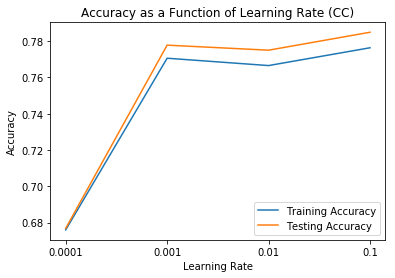

In [19]:
# Manipulating Learning Rate Hyperparameter

rates = [.0001, .001, .01, .1]
trainAccuracies = []
testAccuracies = []

for i in rates:
    lrNN = MLPClassifier(learning_rate_init=i, random_state=2019)
    lrNN.fit(xTrainCC, yTrainCC)
    trainAccuracies.append(accuracy(yTrainCC, lrNN.predict(xTrainCC)))
    testAccuracies.append(accuracy(yTestCC, lrNN.predict(xTestCC)))
    
plt.figure("learningRates")
plt.title("Accuracy as a Function of Learning Rate (CC)")
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3], rates)
plt.legend(loc="best")
plt.show()

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


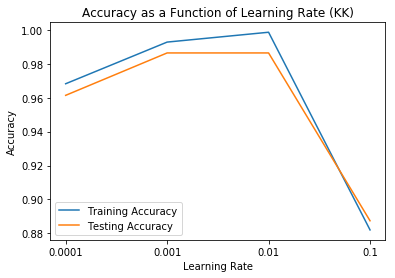

In [20]:
# Duplicate for KK
rates = [.0001, .001, .01, .1]
trainAccuracies = []
testAccuracies = []

for i in rates:
    lrNN = MLPClassifier(learning_rate_init=i, random_state=2019)
    lrNN.fit(xTrainKK, yTrainKK)
    trainAccuracies.append(accuracy(yTrainKK, lrNN.predict(xTrainKK)))
    testAccuracies.append(accuracy(yTestKK, lrNN.predict(xTestKK)))
    
plt.figure("learningRates")
plt.title("Accuracy as a Function of Learning Rate (KK)")
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3], rates)
plt.legend(loc="best")
plt.show()

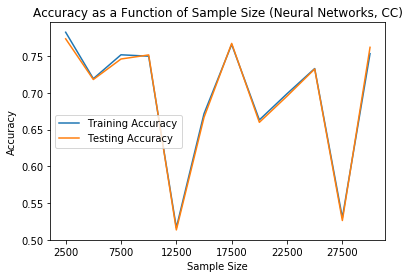

In [21]:
# Manipulating Sample Size

trainAccuracies = []
testAccuracies = []

for i in range(2500, 30001, 2500):
    partialInstancesCC = instancesCC.sample(n=i, random_state=2019)
    partialLabelsCC = labelsCC.sample(n=i, random_state=2019)
    pxTrainCC, pxTestCC, pyTrainCC, pyTestCC = train_test_split(partialInstancesCC, partialLabelsCC, random_state=2019, test_size=.3)
    nnCC.fit(pxTrainCC, pyTrainCC)
    trainAccuracies.append(accuracy(pyTrainCC, nnCC.predict(pxTrainCC)))
    testAccuracies.append(accuracy(yTestCC, nnCC.predict(xTestCC)))
    
plt.figure("sampleSizeNN")
plt.title("Accuracy as a Function of Sample Size (Neural Networks, CC)")
plt.ylabel("Accuracy")
plt.xlabel("Sample Size")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,2,4,6,8,10], [2500, 7500, 12500, 17500, 22500, 27500])
plt.legend(loc="best")
plt.show()

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


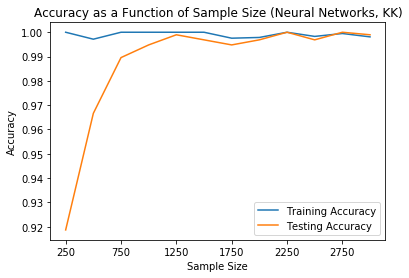

In [55]:
# Duplicating for KK
trainAccuracies = []
testAccuracies = []

for i in range(250, 3001, 250):
    partialInstancesKK = instancesKK.sample(n=i, random_state=2019)
    partialLabelsKK = labelsKK.sample(n=i, random_state=2019)
    pxTrainKK, pxTestKK, pyTrainKK, pyTestKK = train_test_split(partialInstancesKK, partialLabelsKK, random_state=2019, test_size=.3)
    nnKK.fit(pxTrainKK, pyTrainKK)
    trainAccuracies.append(accuracy(pyTrainKK, nnKK.predict(pxTrainKK)))
    testAccuracies.append(accuracy(yTestKK, nnKK.predict(xTestKK)))
    
plt.figure("sampleSizeNN")
plt.title("Accuracy as a Function of Sample Size (Neural Networks, KK)")
plt.ylabel("Accuracy")
plt.xlabel("Sample Size")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,2,4,6,8,10], [250, 750, 1250, 1750, 2250, 2750])
plt.legend(loc="best")
plt.show()

In [23]:
# Cross Validation - Let's see what the best params will be.
nnParametersCC = {"hidden_layer_sizes": [ (50,), (100,), (150,)],
                "learning_rate_init": [.0001, .001, .01]}
t0 = time.time()
optimalNN_CC = GridSearchCV(nnCC, nnParametersCC, cv=5, refit=True)
optimalNN_CC.fit(xTrainCC, yTrainCC)
t1 = time.time()

predictionsCC = optimalNN_CC.predict(xTrainCC)
t2 = time.time()
print("Accuracy of Optimal Neural Network (Training Data, CC): " + str(accuracy(yTrainCC, predictionsCC)))
predictionsCC = optimalNN_CC.predict(xTestCC)
t3 = time.time()
print("Accuracy of Optimal Neural Network (Testing Data, CC): " + str(accuracy(yTestCC, predictionsCC)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")
print(nnCC)

Accuracy of Optimal Neural Network (Training Data, CC): 0.773952380952381
Accuracy of Optimal Neural Network (Testing Data, CC): 0.7777777777777778
Time to Train: 78.5873670578003s. Times to Test: 0.018466711044311523 and 0.013973712921142578 seconds.
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2019,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [24]:
# Duplicate for KK
nnParametersKK = {"hidden_layer_sizes": [ (50,), (100,), (150,)],
                "learning_rate_init": [.0001, .001, .01]}
t0 = time.time()
optimalNN_KK = GridSearchCV(nnKK, nnParametersKK, cv=5, refit=True)
optimalNN_KK.fit(xTrainKK, yTrainKK)
t1 = time.time()

predictionsKK = optimalNN_KK.predict(xTrainKK)
t2 = time.time()
print("Accuracy of Optimal Neural Network (Training Data, KK): " + str(accuracy(yTrainKK, predictionsKK)))
predictionsKK = optimalNN_KK.predict(xTestKK)
t3 = time.time()
print("Accuracy of Optimal Neural Network (Testing Data, KK): " + str(accuracy(yTestKK, predictionsKK)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")
print(nnKK)

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\sklea

Accuracy of Optimal Neural Network (Training Data, KK): 0.9995529727313366
Accuracy of Optimal Neural Network (Testing Data, KK): 0.9937434827945777
Time to Train: 94.93646812438965s. Times to Test: 0.011478185653686523 and 0.0059893131256103516 seconds.
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2019,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


## Boosting

In [25]:
# Vanilla Boosting Algorithm (Adaboosting)

adaCC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=10), random_state=2019)
t0 = time.time()
adaCC.fit(xTrainCC, yTrainCC)
t1 = time.time()

predictionsCC = adaCC.predict(xTrainCC)
t2 = time.time()
print("Accuracy of Ada Boosted Decision Tree (Training Data, CC): " + str(accuracy(yTrainCC, predictionsCC)))
predictionsCC = adaCC.predict(xTestCC)
t3 = time.time()
print("Accuracy of Ada Boosted Decision Tree (Testing Data, CC): " + str(accuracy(yTestCC, predictionsCC)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of Ada Boosted Decision Tree (Training Data, CC): 0.8449047619047619
Accuracy of Ada Boosted Decision Tree (Testing Data, CC): 0.8064444444444444
Time to Train: 9.934525728225708s. Times to Test: 0.21360301971435547 and 0.09183001518249512 seconds.


In [26]:
# Duplicate for KK
adaKK = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=10), random_state=2019)
t0 = time.time()
adaKK.fit(xTrainKK, yTrainKK)
t1 = time.time()

predictionsKK = adaKK.predict(xTrainKK)
t2 = time.time()
print("Accuracy of Ada Boosted Decision Tree (Training Data, KK): " + str(accuracy(yTrainKK, predictionsKK)))
predictionsKK = adaKK.predict(xTestKK)
t3 = time.time()
print("Accuracy of Ada Boosted Decision Tree (Testing Data, KK): " + str(accuracy(yTestKK, predictionsKK)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of Ada Boosted Decision Tree (Training Data, KK): 0.9986589181940099
Accuracy of Ada Boosted Decision Tree (Testing Data, KK): 0.9916579770594369
Time to Train: 0.47012782096862793s. Times to Test: 0.03193807601928711 and 0.016983747482299805 seconds.


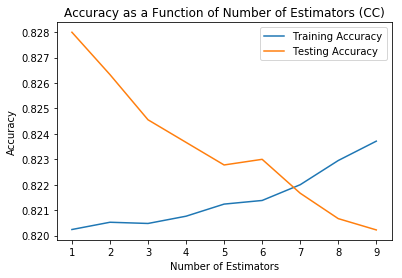

In [53]:
# Manipulating Number of Estimators Hyperparameter

trainAccuracies = []
testAccuracies = []

for i in range(1, 10, 1):
    neAdaCC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=10), n_estimators=i, random_state=2019)
    neAdaCC.fit(xTrainCC, yTrainCC)
    trainAccuracies.append(accuracy(yTrainCC, neAdaCC.predict(xTrainCC)))
    testAccuracies.append(accuracy(yTestCC, neAdaCC.predict(xTestCC)))
    
plt.figure("numEstimatorsCC")
plt.title("Accuracy as a Function of Number of Estimators (CC)")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3,4,5,6,7,8], range(1,10))
plt.legend(loc="best")
plt.show()

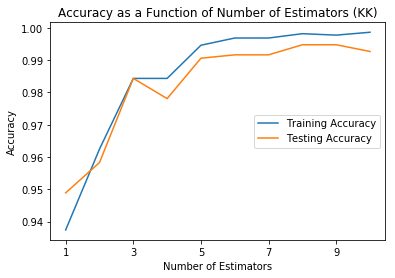

In [28]:
# Duplicate for KK

trainAccuracies = []
testAccuracies = []

for i in range(1,11):
    neAdaKK = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=10), n_estimators=i, random_state=2019)
    neAdaKK.fit(xTrainKK, yTrainKK)
    trainAccuracies.append(accuracy(yTrainKK, neAdaKK.predict(xTrainKK)))
    testAccuracies.append(accuracy(yTestKK, neAdaKK.predict(xTestKK)))
    
plt.figure("numEstimatorsKK")
plt.title("Accuracy as a Function of Number of Estimators (KK)")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,2,4,6,8], [1,3,5,7,9])
plt.legend(loc="center right")
plt.show()

Time to fit and use cross validated adaboost tree with 5 folds: 20.48390769958496 seconds.
Time to fit and use cross validated adaboost tree with 5 folds: 34.268277406692505 seconds.
Time to fit and use cross validated adaboost tree with 5 folds: 50.45917201042175 seconds.
Time to fit and use cross validated adaboost tree with 5 folds: 56.70805358886719 seconds.


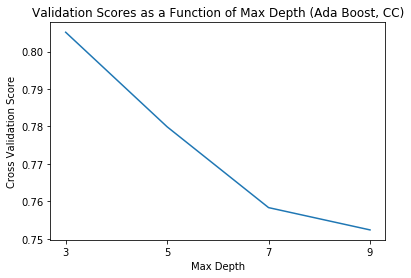

In [29]:
# Adaboost Cross Validation Scores For Varying Max Depths

scoresCC = []
depthsCC = [3, 5, 7, 9]

for i in depthsCC:
    cvAdaCC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i, min_samples_leaf=10), random_state=2019)
    t0 = time.time()
    scoresCC.append(cross_val_score(cvAdaCC, xTrainCC, yTrainCC, cv=5))
    t1 = time.time()
    print("Time to fit and use cross validated adaboost tree with 5 folds: " + str(t1-t0) + " seconds.")
    
temp = []
for i in scoresCC:
    temp.append(sum(i)/len(i))
scoresCC = temp
    
plt.figure("adaValidationCC")
plt.title("Validation Scores as a Function of Max Depth (Ada Boost, CC)")
plt.ylabel("Cross Validation Score")
plt.xlabel("Max Depth")
plt.plot(scoresCC)
plt.xticks([0,1,2,3], depthsCC)
plt.show()

Time to fit and use cross validated adaboost tree with 5 folds: 1.5980420112609863 seconds.
Time to fit and use cross validated adaboost tree with 5 folds: 1.7048158645629883 seconds.
Time to fit and use cross validated adaboost tree with 5 folds: 1.9723472595214844 seconds.
Time to fit and use cross validated adaboost tree with 5 folds: 2.0861074924468994 seconds.


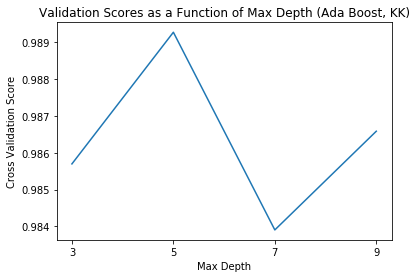

In [30]:
# Duplicate for KK

scoresKK = []
depthsKK = [3, 5, 7, 9]

for i in depthsKK:
    cvAdaKK = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i, min_samples_leaf=10), random_state=2019)
    t0 = time.time()
    scoresKK.append(cross_val_score(cvAdaKK, xTrainKK, yTrainKK, cv=5))
    t1 = time.time()
    print("Time to fit and use cross validated adaboost tree with 5 folds: " + str(t1-t0) + " seconds.")
    
temp = []
for i in scoresKK:
    temp.append(sum(i)/len(i))
scoresKK = temp
    
plt.figure("adaValidationKK")
plt.title("Validation Scores as a Function of Max Depth (Ada Boost, KK)")
plt.ylabel("Cross Validation Score")
plt.xlabel("Max Depth")
plt.plot(scoresKK)
plt.xticks([0,1,2,3], depthsKK)
plt.show()

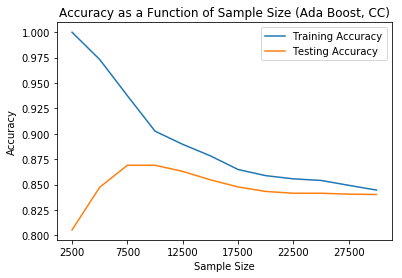

In [31]:
# Manipulating Sample Size

trainAccuracies = []
testAccuracies = []

for i in range(2500, 30001, 2500):
    partialInstancesCC = instancesCC.sample(n=i, random_state=2019)
    partialLabelsCC = labelsCC.sample(n=i, random_state=2019)
    pxTrainCC, pxTestCC, pyTrainCC, pyTestCC = train_test_split(partialInstancesCC, partialLabelsCC, random_state=2019, test_size=.3)
    adaCC.fit(pxTrainCC, pyTrainCC)
    trainAccuracies.append(accuracy(pyTrainCC, adaCC.predict(pxTrainCC)))
    testAccuracies.append(accuracy(yTestCC, adaCC.predict(xTestCC)))
    
plt.figure("sampleSizeAdaCC")
plt.title("Accuracy as a Function of Sample Size (Ada Boost, CC)")
plt.ylabel("Accuracy")
plt.xlabel("Sample Size")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,2,4,6,8,10], [2500, 7500, 12500, 17500, 22500, 27500])
plt.legend(loc="best")
plt.show()

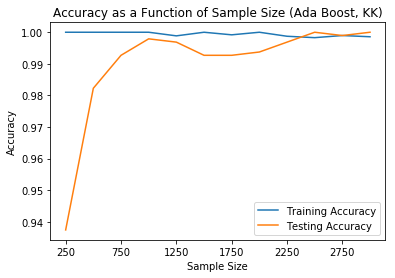

In [32]:
# Duplicate for KK

trainAccuracies = []
testAccuracies = []

for i in range(250, 3001, 250):
    partialInstancesKK = instancesKK.sample(n=i, random_state=2019)
    partialLabelsKK = labelsKK.sample(n=i, random_state=2019)
    pxTrainKK, pxTestKK, pyTrainKK, pyTestKK = train_test_split(partialInstancesKK, partialLabelsKK, random_state=2019, test_size=.3)
    adaKK.fit(pxTrainKK, pyTrainKK)
    trainAccuracies.append(accuracy(pyTrainKK, adaKK.predict(pxTrainKK)))
    testAccuracies.append(accuracy(yTestKK, adaKK.predict(xTestKK)))
    
plt.figure("sampleSizeAdaKK")
plt.title("Accuracy as a Function of Sample Size (Ada Boost, KK)")
plt.ylabel("Accuracy")
plt.xlabel("Sample Size")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,2,4,6,8,10], [250, 750, 1250, 1750, 2250, 2750])
plt.legend(loc="best")
plt.show()

## Support Vector Machines

In [33]:
# Vanilla SVM Algorithm (Sigmoid Kernel)

svmCC = SupportVectorClassifier(kernel="sigmoid", random_state=2019)
t0 = time.time()
svmCC.fit(xTrainCC, yTrainCC)
t1 = time.time()

predictionsCC = svmCC.predict(xTrainCC)
t2 = time.time()
print("Accuracy of SVM with Sigmoid Kernel (Training Data, CC): " + str(accuracy(yTrainCC, predictionsCC)))
predictionsCC = svmCC.predict(xTestCC)
t3 = time.time()
print("Accuracy of SVM with Sigmoid Kernel (Testing Data, CC): " + str(accuracy(yTestCC, predictionsCC)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of SVM with Sigmoid Kernel (Training Data, CC): 0.6568095238095238
Accuracy of SVM with Sigmoid Kernel (Testing Data, CC): 0.6603333333333333
Time to Train: 8.237683534622192s. Times to Test: 5.567146062850952 and 2.3012211322784424 seconds.


In [34]:
# Duplicate for KK

svmKK = SupportVectorClassifier(kernel="sigmoid", random_state=2019)
t0 = time.time()
svmKK.fit(xTrainKK, yTrainKK)
t1 = time.time()

predictionsKK = svmKK.predict(xTrainKK)
t2 = time.time()
print("Accuracy of SVM with Sigmoid Kernel (Training Data, KK): " + str(accuracy(yTrainKK, predictionsKK)))
predictionsKK = svmKK.predict(xTestKK)
t3 = time.time()
print("Accuracy of SVM with Sigmoid Kernel (Testing Data, KK): " + str(accuracy(yTestKK, predictionsKK)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of SVM with Sigmoid Kernel (Training Data, KK): 0.9016540008940546
Accuracy of SVM with Sigmoid Kernel (Testing Data, KK): 0.9249217935349322
Time to Train: 0.3733034133911133s. Times to Test: 0.2335655689239502 and 0.10181260108947754 seconds.


In [35]:
# Vanilla SVM Algorithm (RBF Kernel)

svmCC = SupportVectorClassifier(kernel="rbf", random_state=2019)
t0 = time.time()
svmCC.fit(xTrainCC, yTrainCC)
t1 = time.time()

predictionsCC = svmCC.predict(xTrainCC)
t2 = time.time()
print("Accuracy of SVM with RBF Kernel (Training Data, CC): " + str(accuracy(yTrainCC, predictionsCC)))
predictionsCC = svmCC.predict(xTestCC)
t3 = time.time()
print("Accuracy of SVM with RBF Kernel (Testing Data, CC): " + str(accuracy(yTestCC, predictionsCC)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of SVM with RBF Kernel (Training Data, CC): 0.9935238095238095
Accuracy of SVM with RBF Kernel (Testing Data, CC): 0.7856666666666666
Time to Train: 192.56893730163574s. Times to Test: 43.370341300964355 and 20.619158506393433 seconds.


In [36]:
# Duplicate for KK

svmKK = SupportVectorClassifier(kernel="rbf", random_state=2019)
t0 = time.time()
svmKK.fit(xTrainKK, yTrainKK)
t1 = time.time()

predictionsKK = svmKK.predict(xTrainKK)
t2 = time.time()
print("Accuracy of SVM RBF Kernel (Training Data, KK): " + str(accuracy(yTrainKK, predictionsKK)))
predictionsKK = svmKK.predict(xTestKK)
t3 = time.time()
print("Accuracy of SVM RBF Kernel (Testing Data, KK): " + str(accuracy(yTestKK, predictionsKK)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of SVM RBF Kernel (Training Data, KK): 0.9351810460438087
Accuracy of SVM RBF Kernel (Testing Data, KK): 0.9457768508863399
Time to Train: 0.34737133979797363s. Times to Test: 0.18813490867614746 and 0.08384490013122559 seconds.


Time for 0.01 is: 164.12830710411072seconds.
Time for 0.1 is: 207.69579339027405seconds.
Time for 1.0 is: 251.13553261756897seconds.
Time for 10.0 is: 313.0503761768341seconds.
Time for 100.0 is: 288.67670941352844seconds.


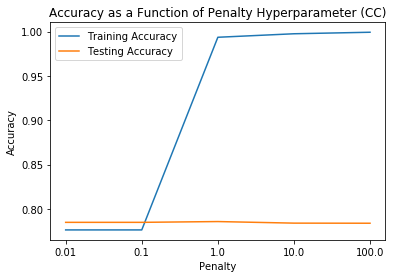

In [50]:
# Manipulating Penalty Hyperparameter

c = [.01, .1, 1.0, 10.0, 100.0]
trainAccuracies = []
testAccuracies = []

for i in c:
    t0 = time.time()
    psvmCC = SupportVectorClassifier(C=i, kernel="rbf", random_state=2019)
    psvmCC.fit(xTrainCC, yTrainCC)
    trainAccuracies.append(accuracy(yTrainCC, psvmCC.predict(xTrainCC)))
    testAccuracies.append(accuracy(yTestCC, psvmCC.predict(xTestCC)))
    print("Time for " + str(i) + " is: " + str(time.time() - t0) + " seconds.")
    
plt.figure("penaltyCC")
plt.title("Accuracy as a Function of Penalty Hyperparameter (CC)")
plt.ylabel("Accuracy")
plt.xlabel("Penalty")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3,4], c)
plt.legend(loc="best")
plt.show()

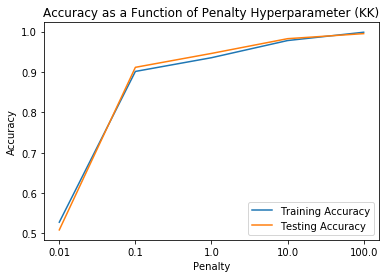

In [38]:
# Manipulating Penalty Hyperparameter for KK

c = [.01, .1, 1.0, 10.0, 100.0]
trainAccuracies = []
testAccuracies = []

for i in c:
    psvmKK = SupportVectorClassifier(C=i, kernel="rbf", random_state=2019)
    psvmKK.fit(xTrainKK, yTrainKK)
    trainAccuracies.append(accuracy(yTrainKK, psvmKK.predict(xTrainKK)))
    testAccuracies.append(accuracy(yTestKK, psvmKK.predict(xTestKK)))
    
plt.figure("penaltyKK")
plt.title("Accuracy as a Function of Penalty Hyperparameter (KK)")
plt.ylabel("Accuracy")
plt.xlabel("Penalty")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3,4], c)
plt.legend(loc="best")
plt.show()

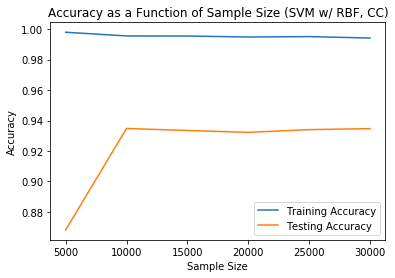

In [39]:
# Manipulating Sample Size

trainAccuracies = []
testAccuracies = []

for i in range(5000, 30001, 5000):
    partialInstancesCC = instancesCC.sample(n=i, random_state=2019)
    partialLabelsCC = labelsCC.sample(n=i, random_state=2019)
    pxTrainCC, pxTestCC, pyTrainCC, pyTestCC = train_test_split(partialInstancesCC, partialLabelsCC, random_state=2019, test_size=.3)
    
    svmCC = SupportVectorClassifier(kernel="rbf", random_state=2019)
    svmCC.fit(pxTrainCC, pyTrainCC)
    trainAccuracies.append(accuracy(pyTrainCC, svmCC.predict(pxTrainCC)))
    testAccuracies.append(accuracy(yTestCC, svmCC.predict(xTestCC)))
    
plt.figure("sampleSizeSvmCC")
plt.title("Accuracy as a Function of Sample Size (SVM w/ RBF, CC)")
plt.ylabel("Accuracy")
plt.xlabel("Sample Size")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,1,2,3,4,5], [5000, 10000, 15000, 20000, 25000, 30000])
plt.legend(loc="best")
plt.show()

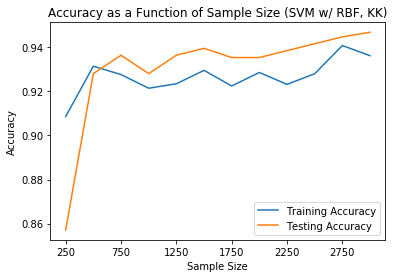

In [40]:
# Duplicate for KK

trainAccuracies = []
testAccuracies = []

for i in range(250, 3001, 250):
    partialInstancesKK = instancesKK.sample(n=i, random_state=2019)
    partialLabelsKK = labelsKK.sample(n=i, random_state=2019)
    pxTrainKK, pxTestKK, pyTrainKK, pyTestKK = train_test_split(partialInstancesKK, partialLabelsKK, random_state=2019, test_size=.3)
    
    svmKK = SupportVectorClassifier(kernel="rbf", random_state=2019)
    svmKK.fit(pxTrainKK, pyTrainKK)
    trainAccuracies.append(accuracy(pyTrainKK, svmKK.predict(pxTrainKK)))
    testAccuracies.append(accuracy(yTestKK, svmKK.predict(xTestKK)))
    
plt.figure("sampleSizeSvmKK")
plt.title("Accuracy as a Function of Sample Size (SVM w/ RBF, KK)")
plt.ylabel("Accuracy")
plt.xlabel("Sample Size")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,2,4,6,8,10], [250, 750, 1250, 1750, 2250, 2750])
plt.legend(loc="best")
plt.show()

## k Nearest Neighbors

In [41]:
# Vanilla kNN Algorithm

knnCC = KNeighborsClassifier()
t0 = time.time()
knnCC.fit(xTrainCC, yTrainCC)
t1 = time.time()

predictionsCC = knnCC.predict(xTrainCC)
t2 = time.time()
print("Accuracy of kNN (Training Data, CC): " + str(accuracy(yTrainCC, predictionsCC)))
predictionsCC = knnCC.predict(xTestCC)
t3 = time.time()
print("Accuracy of kNN (Testing Data, CC): " + str(accuracy(yTestCC, predictionsCC)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of kNN (Training Data, CC): 0.8142857142857143
Accuracy of kNN (Testing Data, CC): 0.7593333333333333
Time to Train: 0.09482288360595703s. Times to Test: 2.861678123474121 and 1.3380122184753418 seconds.


In [42]:
# Duplicate for KK

knnKK = KNeighborsClassifier()
t0 = time.time()
knnKK.fit(xTrainKK, yTrainKK)
t1 = time.time()

predictionsKK = knnKK.predict(xTrainKK)
t2 = time.time()
print("Accuracy of kNN (Training Data, KK): " + str(accuracy(yTrainKK, predictionsKK)))
predictionsKK = knnKK.predict(xTestKK)
t3 = time.time()
print("Accuracy of kNN (Testing Data, KK): " + str(accuracy(yTestKK, predictionsKK)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of kNN (Training Data, KK): 0.978095663835494
Accuracy of kNN (Testing Data, KK): 0.9582898852971846
Time to Train: 0.017464637756347656s. Times to Test: 0.7017111778259277 and 0.2969348430633545 seconds.


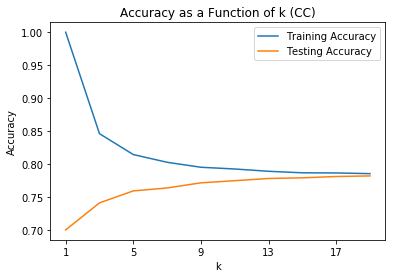

In [60]:
# Manipulating the Number of Neighbors

K = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
trainAccuracies = []
testAccuracies = []

for k in K:
    nknnCC = KNeighborsClassifier(n_neighbors=k)
    nknnCC.fit(xTrainCC, yTrainCC)
    trainAccuracies.append(accuracy(yTrainCC, nknnCC.predict(xTrainCC)))
    testAccuracies.append(accuracy(yTestCC, nknnCC.predict(xTestCC)))
    
plt.figure("k nn CC")
plt.title("Accuracy as a Function of k (CC)")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,2,4,6,8], [1,5,9,13,17])
plt.legend(loc="best")
plt.show()

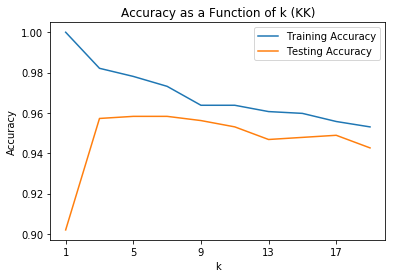

In [61]:
# Duplicate for KK

K = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
trainAccuracies = []
testAccuracies = []

for k in K:
    nknnKK = KNeighborsClassifier(n_neighbors=k)
    nknnKK.fit(xTrainKK, yTrainKK)
    trainAccuracies.append(accuracy(yTrainKK, nknnKK.predict(xTrainKK)))
    testAccuracies.append(accuracy(yTestKK, nknnKK.predict(xTestKK)))
    
plt.figure("k nn KK")
plt.title("Accuracy as a Function of k (KK)")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.plot(trainAccuracies, label="Training Accuracy")
plt.plot(testAccuracies, label="Testing Accuracy")
plt.xticks([0,2,4,6,8], [1,5,9,13,17])
plt.legend(loc="best")
plt.show()

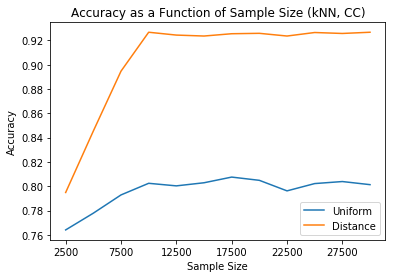

In [45]:
# Here we're going to plot uniform vs distance and sample size

uniform = []
distance = []

for i in range(2500, 30001, 2500):
    partialInstancesCC = instancesCC.sample(n=i, random_state=2019)
    partialLabelsCC = labelsCC.sample(n=i, random_state=2019)
    pxTrainCC, pxTestCC, pyTrainCC, pyTestCC = train_test_split(partialInstancesCC, partialLabelsCC, random_state=2019, test_size=.3)
    
    uknnCC = KNeighborsClassifier(weights="uniform")
    uknnCC.fit(pxTrainCC, pyTrainCC)
    uniform.append(accuracy(yTestCC, uknnCC.predict(xTestCC)))
    
    dknnCC = KNeighborsClassifier(weights="distance")
    dknnCC.fit(pxTrainCC, pyTrainCC)
    distance.append(accuracy(yTestCC, dknnCC.predict(xTestCC)))
    
plt.figure("sampleSizeKnnCC")
plt.title("Accuracy as a Function of Sample Size (kNN, CC)")
plt.ylabel("Accuracy")
plt.xlabel("Sample Size")
plt.plot(uniform, label="Uniform")
plt.plot(distance, label="Distance")
plt.xticks([0,2,4,6,8,10], [2500, 7500, 12500, 17500, 22500, 27500])
plt.legend(loc="best")
plt.show()

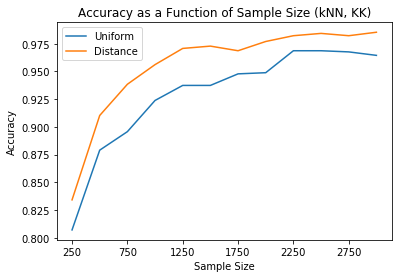

In [46]:
# Duplicate for KK

uniform = []
distance = []

for i in range(250, 3001, 250):
    partialInstancesKK = instancesKK.sample(n=i, random_state=2019)
    partialLabelsKK = labelsKK.sample(n=i, random_state=2019)
    pxTrainKK, pxTestKK, pyTrainKK, pyTestKK = train_test_split(partialInstancesKK, partialLabelsKK, random_state=2019, test_size=.3)
    
    uknnKK = KNeighborsClassifier(weights="uniform")
    uknnKK.fit(pxTrainKK, pyTrainKK)
    uniform.append(accuracy(yTestKK, uknnKK.predict(xTestKK)))
    
    dknnKK = KNeighborsClassifier(weights="distance")
    dknnKK.fit(pxTrainKK, pyTrainKK)
    distance.append(accuracy(yTestKK, dknnKK.predict(xTestKK)))
    
plt.figure("sampleSizeKnnKK")
plt.title("Accuracy as a Function of Sample Size (kNN, KK)")
plt.ylabel("Accuracy")
plt.xlabel("Sample Size")
plt.plot(uniform, label="Uniform")
plt.plot(distance, label="Distance")
plt.xticks([0,2,4,6,8,10], [250, 750, 1250, 1750, 2250, 2750])
plt.legend(loc="best")
plt.show()

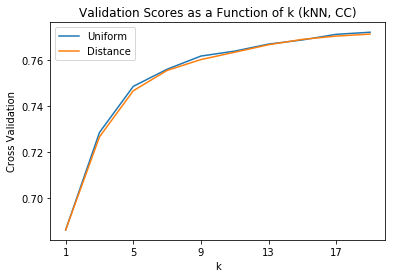

In [47]:
# Cross Validation Scores for kNN uniform/distance with varying values of k

K = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
uniform = []
distance = []

for k in K:
    uknnCC = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    uniform.append(cross_val_score(uknnCC, xTrainCC, yTrainCC, cv=5))
    
    dknnCC = KNeighborsClassifier(n_neighbors=k, weights="distance")
    distance.append(cross_val_score(dknnCC, xTrainCC, yTrainCC, cv=5))
    
temp = []
for i in uniform:
    temp.append(sum(i)/len(i))
uniform = temp

temp = []
for i in distance:
    temp.append(sum(i)/len(i))
distance = temp
    
plt.figure("sampleSizeKnnCC")
plt.title("Validation Scores as a Function of k (kNN, CC)")
plt.ylabel("Cross Validation")
plt.xlabel("k")
plt.plot(uniform, label="Uniform")
plt.plot(distance, label="Distance")
plt.xticks([0,2,4,6,8], [1,5,9,13,17])
plt.legend(loc="best")
plt.show()

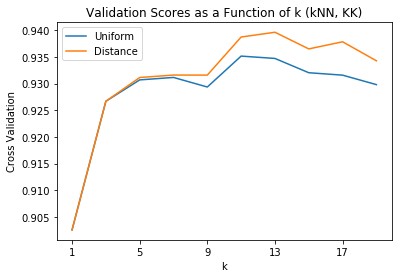

In [48]:
# Duplicate for KK

K = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
uniform = []
distance = []

for k in K:
    uknnKK = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    uniform.append(cross_val_score(uknnKK, xTrainKK, yTrainKK, cv=5))
    
    dknnKK = KNeighborsClassifier(n_neighbors=k, weights="distance")
    distance.append(cross_val_score(dknnKK, xTrainKK, yTrainKK, cv=5))
    
temp = []
for i in uniform:
    temp.append(sum(i)/len(i))
uniform = temp

temp = []
for i in distance:
    temp.append(sum(i)/len(i))
distance = temp
    
plt.figure("sampleSizeKnnKK")
plt.title("Validation Scores as a Function of k (kNN, KK)")
plt.ylabel("Cross Validation")
plt.xlabel("k")
plt.plot(uniform, label="Uniform")
plt.plot(distance, label="Distance")
plt.xticks([0,2,4,6,8], [1,5,9,13,17])
plt.legend(loc="best")
plt.show()

In [49]:
print("CONGRATULATIONS!!! You've made it to the end. Total Runtime: " + str(time.time() - masterTime) + " seconds.")

CONGRATULATIONS!!! You've made it to the end. Total Runtime: 2802.698645591736 seconds.
